<a href="https://colab.research.google.com/github/Yasir323/TimeSeries-Course/blob/main/1_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O dataset.csv https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/013%20IndexE8.csv

--2021-09-13 16:01:45--  https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/013%20IndexE8.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297722 (291K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 290.74K  --.-KB/s    in 0.02s   

2021-09-13 16:01:46 (13.7 MB/s) - ‘dataset.csv’ saved [297722/297722]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
original_raw_data = pd.read_csv('dataset.csv')
raw_data = original_raw_data.copy()
raw_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
raw_data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
raw_data.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

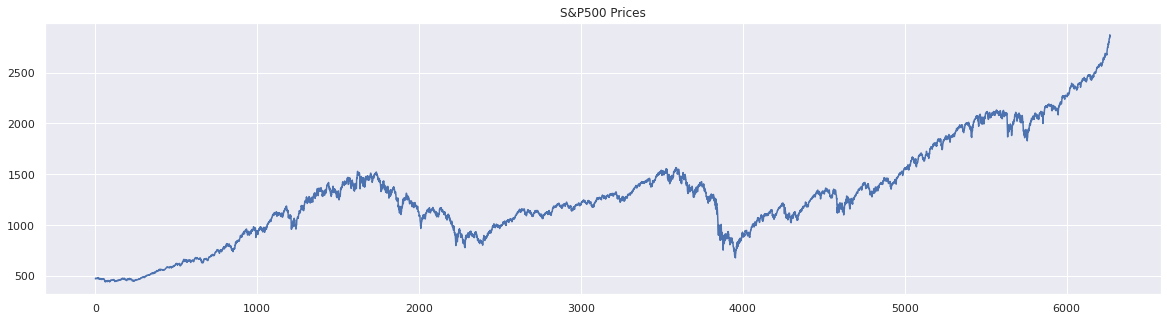

In [6]:
raw_data.spx.plot(figsize=(20, 5), title='S&P500 Prices')
plt.show()

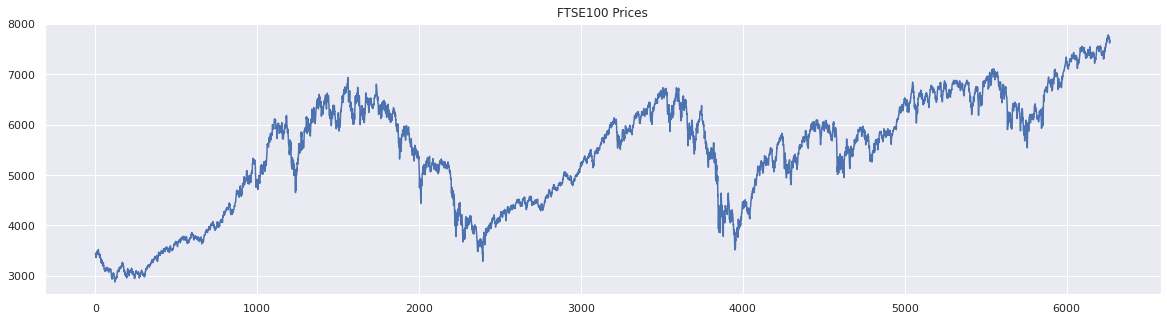

In [7]:
raw_data.ftse.plot(figsize=(20, 5), title='FTSE100 Prices')
plt.show()

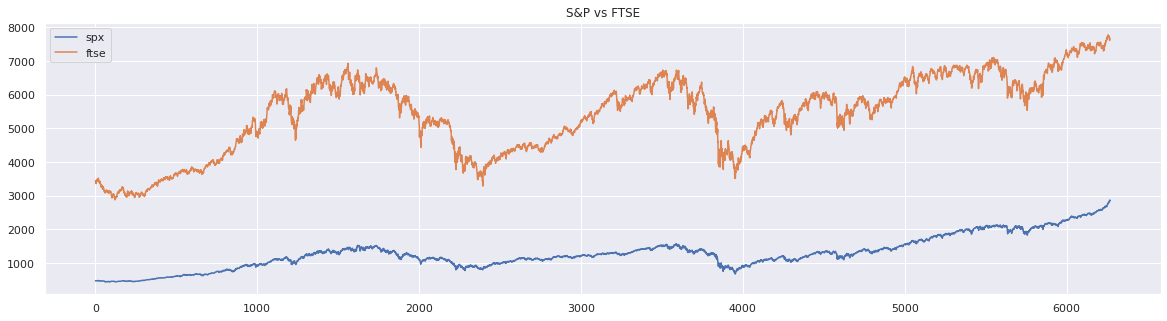

In [8]:
raw_data.spx.plot(figsize=(20, 5))
raw_data.ftse.plot(figsize=(20, 5))
plt.title('S&P vs FTSE')
plt.legend()
plt.show()

### QQ Plot

In [9]:
import scipy.stats
import pylab

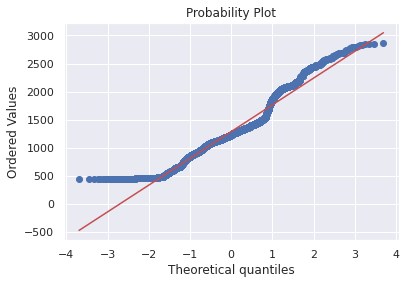

In [10]:
scipy.stats.probplot(raw_data.spx, plot=pylab)
pylab.show()

Let's examine the QQ Plot:
* The y-axis represents the price.
* The x-axis represents how many standard devations from the mean, the values are spreaded.
* The red line represents what the dataset should follow if the data were to be normally distributed. We can see that it is not noramlly distributed. But it is expected as this is a time series data.

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


#### Let's convert date to datetime object

In [12]:
df = raw_data.copy()

In [13]:
df.date = pd.to_datetime(df.date, dayfirst=True)

In [14]:
df.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

#### Let's make date our index

In [15]:
df.set_index('date', inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Let's set the frequency

In [16]:
df = df.asfreq('b')  # Business days
df.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-17,473.30,2115.56,3407.83,18725.37
1994-01-18,474.25,2130.35,3437.01,18514.55
1994-01-19,474.30,2132.52,3475.15,19039.40


#### Missing Values

In [17]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [18]:
df.interpolate(inplace=True)
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Simplify the dataset
We'll analyze s&p data only.

In [19]:
df_sp = df.spx.to_frame()
df_sp.columns = ['Market Value']
df_sp.head()

,Market Value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [20]:
train_size = int(len(df_sp) * 0.8)

In [21]:
X_train = df_sp.iloc[:train_size]
X_test = df_sp.iloc[train_size:]
X_train.tail(), X_test.tail()

(            Market Value
 date                    
 2013-04-01   1562.173837
 2013-04-02   1570.252238
 2013-04-03   1553.686978
 2013-04-04   1559.979316
 2013-04-05   1553.278930,             Market Value
 date                    
 2018-01-23   2839.130362
 2018-01-24   2837.544008
 2018-01-25   2839.253031
 2018-01-26   2872.867839
 2018-01-29   2853.528411)

## White Noise
A special type of time series where the data doesn't follow a pattern.

**Conditions for white noise:**
* Constant (Zero) mean
* Constant variance
* No autocorrelation

Lets generate a white noise

In [22]:
white_noise = np.random.normal(
    loc=X_train['Market Value'].mean(),
    scale=X_train['Market Value'].std(),
    size=len(X_train)
)

In [23]:
X_train['White Noise'] = white_noise
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Market Value,White Noise
date,,
1994-01-07,469.90,1510.703832
1994-01-10,475.27,928.902317
1994-01-11,474.13,1045.269592
1994-01-12,474.17,466.340111
1994-01-13,472.47,637.250107


In [24]:
X_train.describe()

,Market Value,White Noise
count,5021.000000,5021.000000
mean,1091.658046,1089.526316
std,292.559254,287.259299
min,438.920000,94.215876
25%,914.835752,897.935939
50%,1144.650000,1088.732047
75%,1316.280729,1285.724748
max,1570.252238,2057.651509


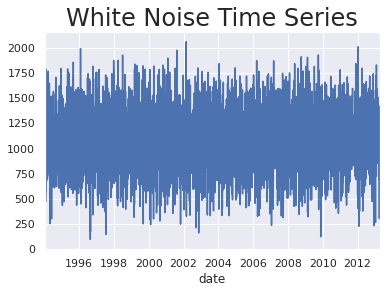

In [25]:
X_train['White Noise'].plot()
plt.title('White Noise Time Series', size=24)
plt.show()

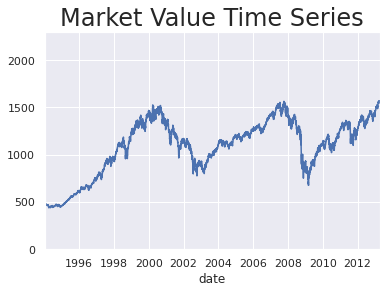

In [26]:
X_train['Market Value'].plot()
plt.title('Market Value Time Series', size=24)
plt.ylim(0, 2300)
plt.show()

## Random Walk
A Special type of time-series, where values tend to persist over time and the differences between periods are simply white noise. 

The best estimator for today's value is yesterday's value.

In [27]:
!wget -O random_walk.csv https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/025%20RandWalk.csv

--2021-09-13 16:01:51--  https://raw.githubusercontent.com/Yasir323/TimeSeries-Course/main/025%20RandWalk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167878 (164K) [text/plain]
Saving to: ‘random_walk.csv’

random_walk.csv     100%[===================>] 163.94K  --.-KB/s    in 0.02s   

2021-09-13 16:01:51 (10.5 MB/s) - ‘random_walk.csv’ saved [167878/167878]



In [28]:
random_walk = pd.read_csv('random_walk.csv')
random_walk.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [29]:
random_walk.date = pd.to_datetime(random_walk.date, dayfirst=True)
random_walk.set_index('date', inplace=True)
random_walk = random_walk.asfreq('b')

In [30]:
random_walk.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [31]:
X_train['Random Walk'] = random_walk.price
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Market Value,White Noise,Random Walk
date,,,
1994-01-07,469.90,1510.703832,1122.139662
1994-01-10,475.27,928.902317,1080.347860
1994-01-11,474.13,1045.269592,1082.095245
1994-01-12,474.17,466.340111,1083.639265
1994-01-13,472.47,637.250107,1067.146255


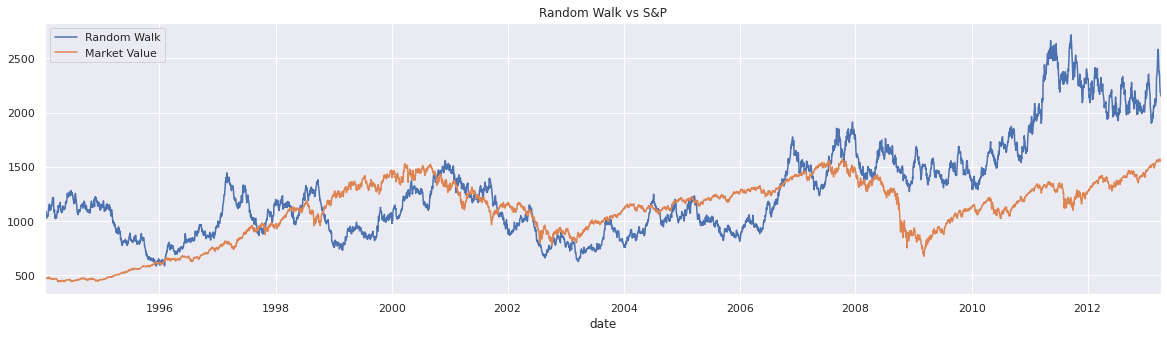

In [32]:
X_train['Random Walk'].plot(figsize=(20, 5))
X_train['Market Value'].plot()
plt.title('Random Walk vs S&P')
plt.legend()
plt.show()

## Market Efficiency
Measures the level of difficulty in forecasting correct future values.

## Stationarity
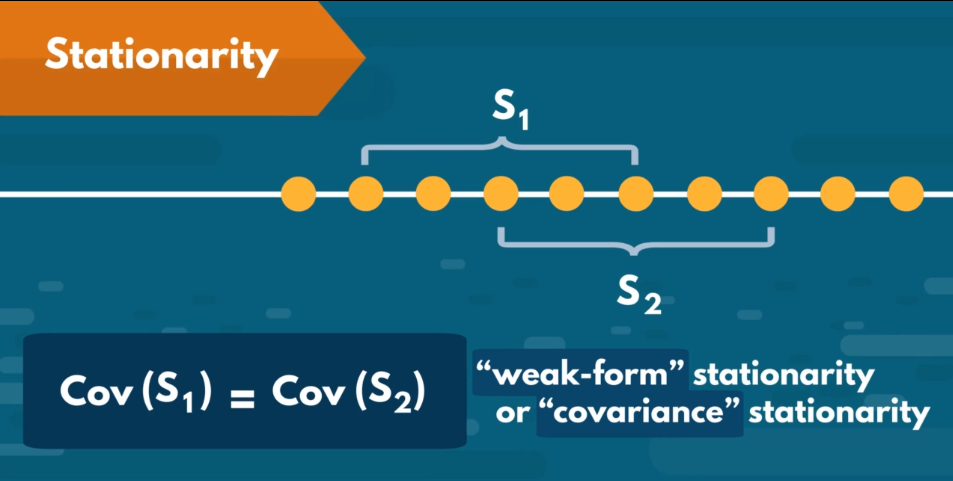

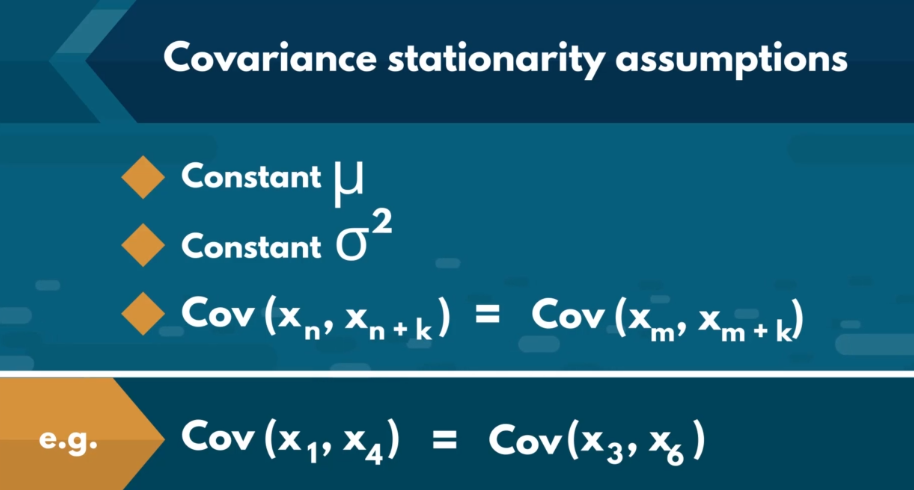

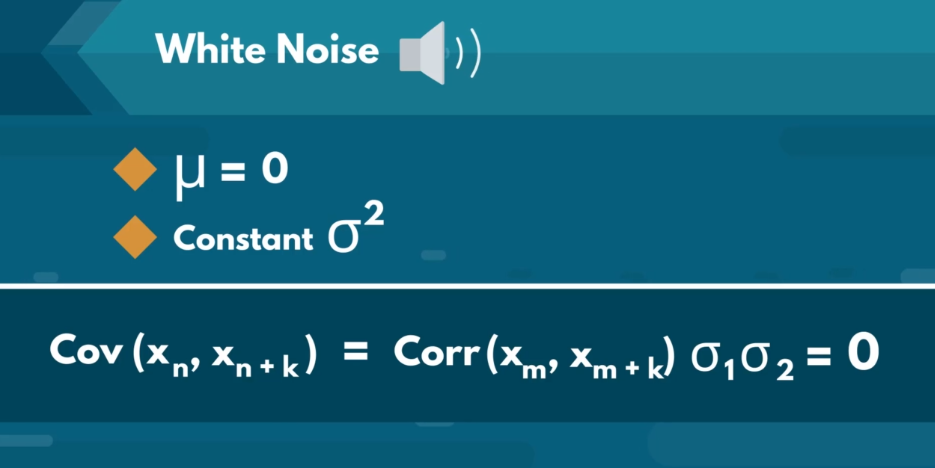

## Strict Stationarity
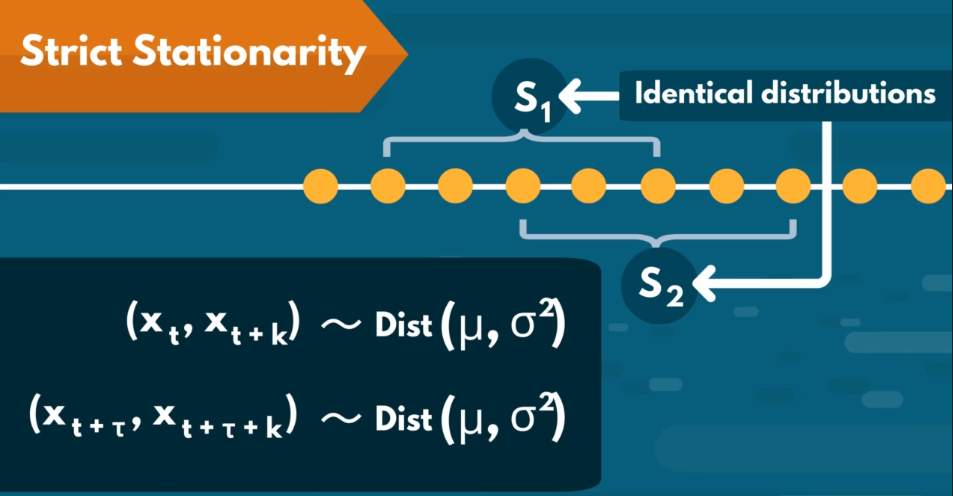

## Dickey-Fuller Test
To conduct time-series analysis, it is vital to check whether data comes from stationary or non-stationary process. Test to check if a dataset comes from a stationary process.

**Null Hypothesis:** Dataset comes from a non-stationary process.

In [33]:
import statsmodels.tsa.stattools as sts

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
sts.adfuller(X_train['Market Value'])

(-1.73714322512195,
 0.4120838713552559,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39897.92531326632)

p value is 0.41 so there's is only a 59% chance of rejecting the null.

In [35]:
sts.adfuller(X_train['White Noise'])

(-22.54127313603484,
 0.0,
 10,
 5010,
 {'1%': -3.4316559188949403,
  '10%': -2.567077177780168,
  '5%': -2.8621170751906178},
 70598.18897446863)

We can say with 100% confidence that White Noise is from a stationary process.

In [36]:
sts.adfuller(X_train['Random Walk'])

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

Again we can't say with certainity that this data comes from a stationary process since p value is only 0.61. Based on the p value there's a 61% chance that the data comes from a non-stationary process.

## Seasonality
* Trend - Pattern
* Seasonal - Cyclical effects
* Residual - Error of prediction

### Naive Decomposition
* Additive: 

$ Observed Value = Trend + Seasonal + Residual $

* Multiplicative:

$ Observed Value = Trend * Seasonal * Residual $

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

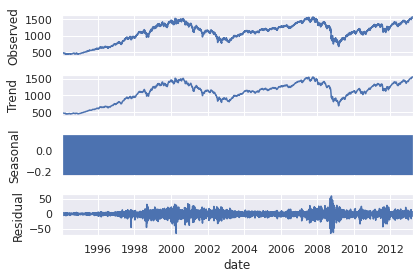

In [38]:
s_dec_additive = seasonal_decompose(X_train['Market Value'], model='additive')
s_dec_additive.plot()
plt.show()

As we can see, the trend part of the decomposition explains most of the variablility in the data.

The seasonal plot is oscillating from -0.2 to 0.1, therefore there is no concrete seasonal pattern.

The residuals vary greatly in 2000 and 2008 due to certain events, like the great depression in 2008.

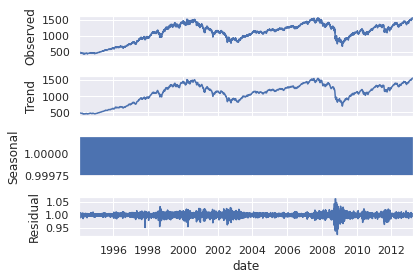

In [39]:
s_dec_multiplicative = seasonal_decompose(X_train['Market Value'], model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

## Correlation
Measures the similatrity in the change of two series.
$ \rho(x, y) $

## Autocorrelation
The correlation between a sequance and itself.
$ \rho(x_t, x_{t-1}) $

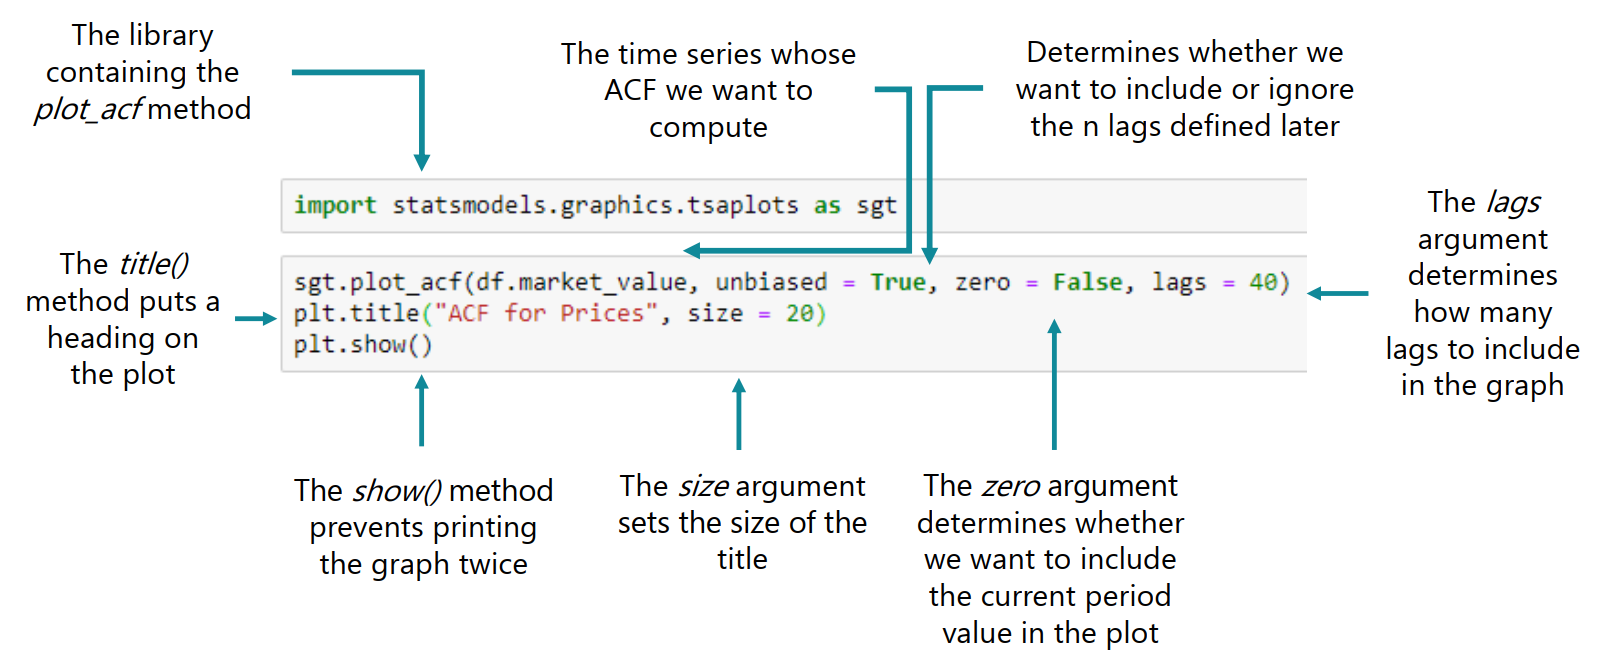

In [40]:
import statsmodels.graphics.tsaplots as sgt

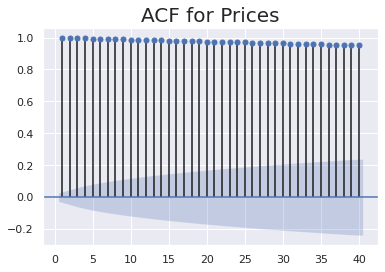

In [41]:
sgt.plot_acf(
    X_train['Market Value'],
    unbiased=True,
    zero=False,
    lags=40
)
plt.title('ACF for Prices', size=20)
plt.show()

If the values lie inside the shaded region, it means they are insignificant.

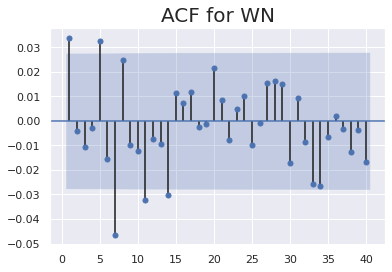

In [42]:
sgt.plot_acf(
    X_train['White Noise'],
    unbiased=True,
    zero=False,
    lags=40
)
plt.title('ACF for WN', size=20)
plt.show()

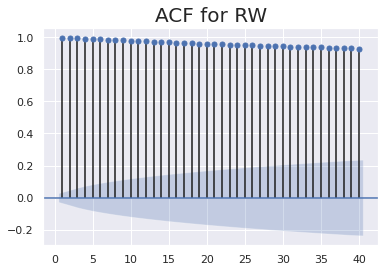

In [43]:
sgt.plot_acf(
    X_train['Random Walk'],
    unbiased=True,
    zero=False,
    lags=40
)
plt.title('ACF for RW', size=20)
plt.show()

## Partial Autocorrelation Function (PACF)
Autocorrelation measures correlation between a time series and a lagged version of itself, however te coefficients also capture second hand effects. i.e. x(t) is affected not only by x(t-1) as well as x(t - 2) and so on... This is also captured by ACF.

If we only want to compute the direct correlation we need to use PACF.

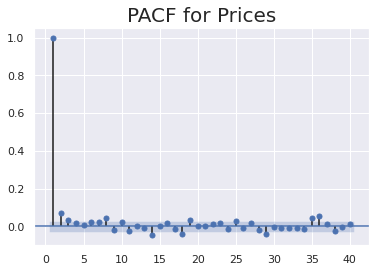

In [44]:
sgt.plot_pacf(
    X_train['Market Value'],
    alpha=0.05,
    zero=False,
    lags=40,
    method=('ols')
)
plt.title('PACF for Prices', size=20)
plt.show()

A few values at the start seem significant. As the lags increase, correlation approaches 0. i.e. It suggests that value 3 days ago have no impact on value today, but value yesterday do influence today's value.

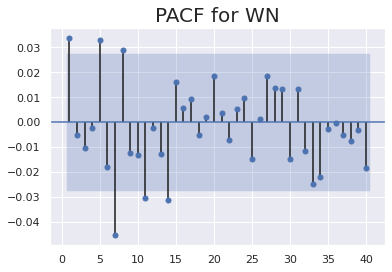

In [45]:
sgt.plot_pacf(
    X_train['White Noise'],
    alpha=0.05,
    zero=False,
    lags=40,
    method=('ols')
)
plt.title('PACF for WN', size=20)
plt.show()

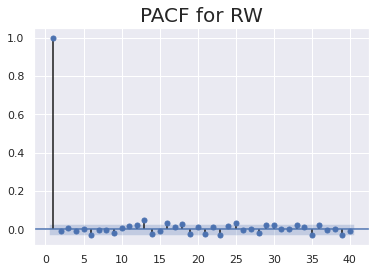

In [46]:
sgt.plot_pacf(
    X_train['Random Walk'],
    alpha=0.05,
    zero=False,
    lags=40,
    method=('ols')
)
plt.title('PACF for RW', size=20)
plt.show()

## Autoregressive Model (AR Model)
A Linear model, where current period values are a sum of past outcomes multiplied by a numeric factor.

$ x_t = C + \phi *  x_{t - 1} + \epsilon_t $, where -1 < $ \phi $ < 1

### Determine the number of lags using ACF and PACF

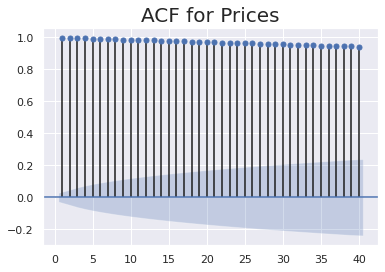

In [47]:
sgt.plot_acf(
    X_train['Market Value'],
    zero=False,
    lags=40
)
plt.title('ACF for Prices', size= 20)
plt.show()

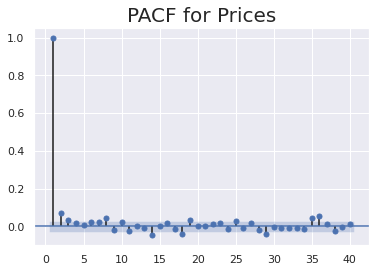

In [48]:
sgt.plot_pacf(
    X_train['Market Value'],
    alpha=0.05,
    zero=False,
    lags=40,
    method=('ols')
)
plt.title('PACF for Prices', size=20)
plt.show()

### AR(1) Model
Using only the last lag.

In [49]:
from statsmodels.tsa.arima_model import ARMA

In [50]:
model_ar = ARMA(
    X_train['Market Value'],
    order=(1, 0)
)

In [51]:
results_ar = model_ar.fit()

In [52]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20093.256
Method:                       css-mle   S.D. of innovations             13.227
Date:                Mon, 13 Sep 2021   AIC                          40192.511
Time:                        16:02:00   BIC                          40212.075
Sample:                    01-07-1994   HQIC                         40199.367
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1072.0312    227.826      4.705      0.000     625.500    1518.562
ar.L1.Market Value     0.9994      0.001   1914.088      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

### Lets try a more complex model since noth the coefficients were significant

In [53]:
model_ar2 = ARMA(
    X_train['Market Value'],
    order=(2, 0)
)
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20081.669
Method:                       css-mle   S.D. of innovations             13.196
Date:                Mon, 13 Sep 2021   AIC                          40171.338
Time:                        16:02:00   BIC                          40197.424
Sample:                    01-07-1994   HQIC                         40180.479
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1065.8477    247.791      4.301      0.000     580.186    1551.510
ar.L1.Market Value     0.9316      0.014     68.110      0.000       0.905       0.958
ar.L2.Market Value     0.0679      0.014      4.961      0.000       0.041       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.7246           +0.0000j           14.7246            0.5000
-----------------------------------------------------------------------------
"""

In [54]:
model_ar3 = ARMA(
    X_train['Market Value'],
    order=(3, 0)
)
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20078.502
Method:                       css-mle   S.D. of innovations             13.188
Date:                Mon, 13 Sep 2021   AIC                          40167.003
Time:                        16:02:02   BIC                          40199.610
Sample:                    01-07-1994   HQIC                         40178.429
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1049.1075    260.610      4.026      0.000     538.322    1559.893
ar.L1.Market Value     0.9291      0.014     68.414      0.000       0.903       0.956
ar.L2.Market Value     0.0348      0.019      1.840      0.066      -0.002       0.072
ar.L3.Market Value     0.0355      0.014      2.518      0.012       0.008       0.063
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -0.9906           -5.2120j            5.3053           -0.2799
AR.3           -0.9906           +5.2120j            5.3053            0.2799
-----------------------------------------------------------------------------
"""

In [55]:
model_ar4 = ARMA(
    X_train['Market Value'],
    order=(4, 0)
)
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20077.542
Method:                       css-mle   S.D. of innovations             13.185
Date:                Mon, 13 Sep 2021   AIC                          40167.083
Time:                        16:02:03   BIC                          40206.211
Sample:                    01-07-1994   HQIC                         40180.794
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1066.7186    263.158      4.054      0.000     550.938    1582.499
ar.L1.Market Value     0.9284      0.014     68.594      0.000       0.902       0.955
ar.L2.Market Value     0.0341      0.019      1.806      0.071      -0.003       0.071
ar.L3.Market Value     0.0174      0.019      0.905      0.365      -0.020       0.055
ar.L4.Market Value     0.0195      0.014      1.385      0.166      -0.008       0.047
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -4.0764           -0.0000j            4.0764           -0.5000
AR.3            1.0921           -3.3689j            3.5415           -0.2001
AR.4            1.0921           +3.3689j            3.5415            0.2001
-----------------------------------------------------------------------------
"""

> We prefer higher log-likelihood and lower information criterion. 

## Log-likelihood Ratio test (LLR Test)

In [56]:
from scipy.stats.distributions import chi2

In [57]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF)
    return round(p, 3)

## compare higher Lag models

In [58]:
LLR_test(results_ar2, results_ar3)

0.012

Since p value is less than 0.05, it means that the difference between the log likelihoods of the 2 models is significant. So we can use a more complex model i.e. AR3

In [59]:
LLR_test(results_ar3, results_ar4)

0.166

In [60]:
model_ar5 = ARMA(
    X_train['Market Value'],
    order=(5, 0)
)
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print('LLR Test', LLR_test(results_ar4, results_ar5))

                              ARMA Model Results                              
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -20077.410
Method:                       css-mle   S.D. of innovations             13.185
Date:                Mon, 13 Sep 2021   AIC                          40168.820
Time:                        16:02:06   BIC                          40214.470
Sample:                    01-07-1994   HQIC                         40184.816
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1052.0556    268.265      3.922      0.000     526.265    1577.846
ar.L1.Market Value     0.9283      0.013     68.842      0.000       0.902       0.955
ar.L2.Market Value  

In [61]:
model_ar6 = ARMA(
    X_train['Market Value'],
    order=(6, 0)
)
results_ar6 = model_ar6.fit()
print(results_ar6.summary())
print('LLR Test', LLR_test(results_ar5, results_ar6))

                              ARMA Model Results                              
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -20075.992
Method:                       css-mle   S.D. of innovations             13.181
Date:                Mon, 13 Sep 2021   AIC                          40167.983
Time:                        16:02:09   BIC                          40220.154
Sample:                    01-07-1994   HQIC                         40186.264
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1069.4856    277.248      3.858      0.000     526.090    1612.881
ar.L1.Market Value     0.9280      0.013     69.572      0.000       0.902       0.954
ar.L2.Market Value  

In [62]:
model_ar7 = ARMA(
    X_train['Market Value'],
    order=(7, 0)
)
results_ar7 = model_ar7.fit()
print(results_ar7.summary())
print('LLR Test', LLR_test(results_ar6, results_ar7))

                              ARMA Model Results                              
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -20074.716
Method:                       css-mle   S.D. of innovations             13.178
Date:                Mon, 13 Sep 2021   AIC                          40167.432
Time:                        16:02:15   BIC                          40226.124
Sample:                    01-07-1994   HQIC                         40187.998
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1047.9422    283.475      3.697      0.000     492.342    1603.542
ar.L1.Market Value     0.9276      0.013     70.040      0.000       0.902       0.954
ar.L2.Market Value  

In [63]:
model_ar8 = ARMA(
    X_train['Market Value'],
    order=(8, 0)
)
results_ar8 = model_ar8.fit()
print(results_ar8.summary())
print('LLR Test', LLR_test(results_ar7, results_ar8))

                              ARMA Model Results                              
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -20070.359
Method:                       css-mle   S.D. of innovations             13.166
Date:                Mon, 13 Sep 2021   AIC                          40160.717
Time:                        16:02:22   BIC                          40225.931
Sample:                    01-07-1994   HQIC                         40183.569
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1055.8916    295.462      3.574      0.000     476.796    1634.987
ar.L1.Market Value     0.9266      0.013     71.456      0.000       0.901       0.952
ar.L2.Market Value  

In [64]:
model_ar9 = ARMA(
    X_train['Market Value'],
    order=(9, 0)
)
results_ar9 = model_ar9.fit()
print(results_ar9.summary())
print('LLR Test', LLR_test(results_ar8, results_ar9))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:           Market Value   No. Observations:                 5021
Model:                     ARMA(9, 0)   Log Likelihood              -20069.501
Method:                       css-mle   S.D. of innovations             13.163
Date:                Mon, 13 Sep 2021   AIC                          40161.001
Time:                        16:02:28   BIC                          40232.737
Sample:                    01-07-1994   HQIC                         40186.138
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1334.8052        nan        nan        nan         nan         nan
ar.L1.Market Value     0.9276      0.010     96.576      0.000       0.909       0.946
ar.L2.Market Value  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


As we can see, beyond AR8, or perhaps AR3 we don't get a better model. Let's confirm this.

In [65]:
print('LLR Test', LLR_test(results_ar, results_ar3, DF=2))

LLR Test 0.0


In [66]:
print('LLR Test', LLR_test(results_ar, results_ar8, DF=7))

LLR Test 0.0


In [67]:
print('LLR Test', LLR_test(results_ar3, results_ar8, DF=5))

LLR Test 0.006


Yes, AR8 model does perform better than rest. But if we want a simpler model we can go for AR3

> AR models work best with stationary processes.

Let's check whether the FTSE comes from a stationary or non-stationary process

In [68]:
sts.adfuller(df.ftse)

(-1.5982265649461271,
 0.48448427150738305,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '10%': -2.567015430304048,
  '5%': -2.862001080749219},
 68467.26258634056)

p value is 0.48, so we cannot conclusively say that it comes from a stationary process. In other terms, we can say that it comes from a non-stationary process.

## Using returns
$ Returns = \frac{p_t - p_{t - 1}}{p_{t - 1}} * 100 $

In [69]:
df_ftse = df.ftse.to_frame()
df_ftse.columns = ['Market Value']
df_ftse.head()
X_train_ftse = df_ftse.iloc[:train_size]
X_test_ftse = df_ftse.iloc[train_size:]
X_train_ftse.tail(), X_test_ftse.tail()

(            Market Value
 date                    
 2013-04-01       6411.74
 2013-04-02       6490.66
 2013-04-03       6420.28
 2013-04-04       6344.11
 2013-04-05       6249.77,             Market Value
 date                    
 2018-01-23   7731.827774
 2018-01-24   7643.428966
 2018-01-25   7615.839954
 2018-01-26   7665.541292
 2018-01-29   7671.533300)

In [70]:
X_train_ftse['returns'] = X_train_ftse['Market Value'].pct_change(1).mul(100)
X_train_ftse = X_train_ftse.iloc[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
sts.adfuller(X_train_ftse.returns)

(-12.778924560328885,
 7.488377514289767e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 15692.835967606281)

Thus we can conclude that the value comes from a stationary process.

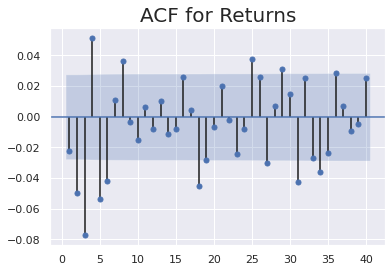

In [72]:
sgt.plot_acf(
    X_train_ftse.returns,
    zero=False,
    lags=40
)
plt.title('ACF for Returns', size= 20)
plt.show()

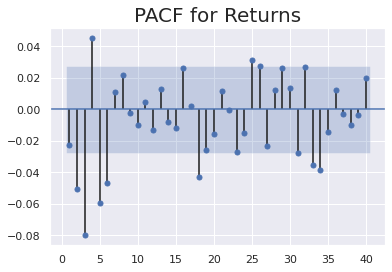

In [73]:
sgt.plot_pacf(
    X_train_ftse.returns,
    alpha=0.05,
    zero=False,
    lags=40,
    method=('ols')
)
plt.title('PACF for Returns', size=20)
plt.show()

In [74]:
model_ret_ar1 = ARMA(
    X_train_ftse.returns,
    order=(1, 0)
)
results_ret_ar1 = model_ret_ar1.fit()
print(results_ret_ar1.summary())
# print('LLR Test', LLR_test(results_ar4, results_ar5))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7926.861
Method:                       css-mle   S.D. of innovations              1.174
Date:                Mon, 13 Sep 2021   AIC                          15859.722
Time:                        16:02:34   BIC                          15879.285
Sample:                    01-10-1994   HQIC                         15866.577
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.158      0.247      -0.013       0.051
ar.L1.returns    -0.0224      0.014     -1.590      0.112      -0.050       0.005
                                    Root

High p-values, so there is no predictive power in this model.

In [75]:
model_ret_ar2 = ARMA(
    X_train_ftse.returns,
    order=(2, 0)
)
results_ret_ar2 = model_ret_ar2.fit()
print(results_ret_ar2.summary())
print('LLR Test', LLR_test(results_ret_ar1, results_ret_ar2))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7920.479
Method:                       css-mle   S.D. of innovations              1.172
Date:                Mon, 13 Sep 2021   AIC                          15848.957
Time:                        16:02:34   BIC                          15875.042
Sample:                    01-10-1994   HQIC                         15858.098
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0236      0.014     -1.673      0.094      -0.051       0.004
ar.L2.returns    -0.0504      0.014     

In [76]:
model_ret_ar3 = ARMA(
    X_train_ftse.returns,
    order=(3, 0)
)
results_ret_ar3 = model_ret_ar3.fit()
print(results_ret_ar3.summary())
print('LLR Test', LLR_test(results_ret_ar2, results_ret_ar3))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7904.359
Method:                       css-mle   S.D. of innovations              1.168
Date:                Mon, 13 Sep 2021   AIC                          15818.718
Time:                        16:02:34   BIC                          15851.324
Sample:                    01-10-1994   HQIC                         15830.144
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.328      0.184      -0.009       0.047
ar.L1.returns    -0.0276      0.014     -1.965      0.049      -0.055   -7.02e-05
ar.L2.returns    -0.0523      0.014     

In [77]:
model_ret_ar3 = ARMA(
    X_train_ftse.returns,
    order=(3, 0)
)
results_ret_ar3 = model_ret_ar3.fit()
print(results_ret_ar3.summary())
print('LLR Test', LLR_test(results_ret_ar2, results_ret_ar3))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7904.359
Method:                       css-mle   S.D. of innovations              1.168
Date:                Mon, 13 Sep 2021   AIC                          15818.718
Time:                        16:02:35   BIC                          15851.324
Sample:                    01-10-1994   HQIC                         15830.144
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.328      0.184      -0.009       0.047
ar.L1.returns    -0.0276      0.014     -1.965      0.049      -0.055   -7.02e-05
ar.L2.returns    -0.0523      0.014     

In [78]:
model_ret_ar4 = ARMA(
    X_train_ftse.returns,
    order=(4, 0)
)
results_ret_ar4 = model_ret_ar4.fit()
print(results_ret_ar4.summary())
print('LLR Test', LLR_test(results_ret_ar3, results_ret_ar4))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7899.185
Method:                       css-mle   S.D. of innovations              1.167
Date:                Mon, 13 Sep 2021   AIC                          15810.370
Time:                        16:02:35   BIC                          15849.497
Sample:                    01-10-1994   HQIC                         15824.081
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.266      0.205      -0.010       0.048
ar.L1.returns    -0.0240      0.014     -1.704      0.088      -0.052       0.004
ar.L2.returns    -0.0500      0.014     

In [79]:
model_ret_ar5 = ARMA(
    X_train_ftse.returns,
    order=(5, 0)
)
results_ret_ar5 = model_ret_ar5.fit()
print(results_ret_ar5.summary())
print('LLR Test', LLR_test(results_ret_ar4, results_ret_ar5))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7890.239
Method:                       css-mle   S.D. of innovations              1.165
Date:                Mon, 13 Sep 2021   AIC                          15794.478
Time:                        16:02:35   BIC                          15840.126
Sample:                    01-10-1994   HQIC                         15810.473
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.347      0.178      -0.009       0.046
ar.L1.returns    -0.0213      0.014     -1.513      0.130      -0.049       0.006
ar.L2.returns    -0.0546      0.014     

In [80]:
model_ret_ar6 = ARMA(
    X_train_ftse.returns,
    order=(6, 0)
)
results_ret_ar6 = model_ret_ar6.fit()
print(results_ret_ar6.summary())
print('LLR Test', LLR_test(results_ret_ar5, results_ret_ar6))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7884.821
Method:                       css-mle   S.D. of innovations              1.164
Date:                Mon, 13 Sep 2021   AIC                          15785.642
Time:                        16:02:36   BIC                          15837.811
Sample:                    01-10-1994   HQIC                         15803.923
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.413      0.158      -0.007       0.045
ar.L1.returns    -0.0241      0.014     -1.708      0.088      -0.052       0.004
ar.L2.returns    -0.0526      0.014     

In [81]:
model_ret_ar7 = ARMA(
    X_train_ftse.returns,
    order=(7, 0)
)
results_ret_ar7 = model_ret_ar7.fit()
print(results_ret_ar7.summary())
print('LLR Test', LLR_test(results_ret_ar6, results_ret_ar7))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7884.533
Method:                       css-mle   S.D. of innovations              1.164
Date:                Mon, 13 Sep 2021   AIC                          15787.067
Time:                        16:02:38   BIC                          15845.757
Sample:                    01-10-1994   HQIC                         15807.633
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.398      0.162      -0.008       0.045
ar.L1.returns    -0.0236      0.014     -1.671      0.095      -0.051       0.004
ar.L2.returns    -0.0519      0.014     

So, AR6 model is the best here.
> **Conclusion:** *When using AR models, prefer to use returns rather than prices due to the non-stationary nature of the prices*.

## Normalizing Values


In [82]:
benchmark = X_train['Market Value'].iloc[0]

In [83]:
X_train['norm'] = X_train['Market Value'].div(benchmark).mul(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
sts.adfuller(X_train.norm)

(-1.737143225122581,
 0.41208387135493457,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 24461.56450534243)

## Normalized returns

In [85]:
X_train_ftse.columns

Index(['Market Value', 'returns'], dtype='object')

In [86]:
bench_ret = X_train_ftse['returns'].iloc[0]
X_train_ftse['norm_ret'] = X_train_ftse['returns'].div(bench_ret).mul(100)

In [87]:
sts.adfuller(X_train_ftse.norm_ret)

(-12.778924560328905,
 7.488377514289069e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 80110.55988315775)

> Normalizing does not affect stationarity

In [88]:
model_norm_ret_ar1 = ARMA(
    X_train_ftse.norm_ret,
    order=(1, 0)
)
results_norm_ret_ar1 = model_norm_ret_ar1.fit()
print(results_norm_ret_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40348.855
Method:                       css-mle   S.D. of innovations            748.957
Date:                Mon, 13 Sep 2021   AIC                          80703.711
Time:                        16:02:40   BIC                          80723.274
Sample:                    01-10-1994   HQIC                         80710.566
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9680     10.339     -1.158      0.247     -32.232       8.296
ar.L1.norm_ret    -0.0224      0.014     -1.590      0.112      -0.050       0.005
                                    

In [89]:
model_norm_ret_ar2 = ARMA(
    X_train_ftse.norm_ret,
    order=(2, 0)
)
results_norm_ret_ar2 = model_norm_ret_ar2.fit()
print(results_norm_ret_ar2.summary())
print('LLR Test', LLR_test(results_norm_ret_ar1, results_norm_ret_ar2))

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40342.473
Method:                       css-mle   S.D. of innovations            748.005
Date:                Mon, 13 Sep 2021   AIC                          80692.947
Time:                        16:02:40   BIC                          80719.031
Sample:                    01-10-1994   HQIC                         80702.087
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9680      9.830     -1.217      0.223     -31.235       7.299
ar.L1.norm_ret    -0.0236      0.014     -1.673      0.094      -0.051       0.004
ar.L2.norm_ret    -0.0504      0.014

In [90]:
model_norm_ret_ar6 = ARMA(
    X_train_ftse.norm_ret,
    order=(2, 0)
)
results_norm_ret_ar6 = model_norm_ret_ar6.fit()
print(results_norm_ret_ar6.summary())
print('LLR Test', LLR_test(results_norm_ret_ar1, results_norm_ret_ar6, DF=5))

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40342.473
Method:                       css-mle   S.D. of innovations            748.005
Date:                Mon, 13 Sep 2021   AIC                          80692.947
Time:                        16:02:40   BIC                          80719.031
Sample:                    01-10-1994   HQIC                         80702.087
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9680      9.830     -1.217      0.223     -31.235       7.299
ar.L1.norm_ret    -0.0236      0.014     -1.673      0.094      -0.051       0.004
ar.L2.norm_ret    -0.0504      0.014

In [91]:
model_norm_ret_ar7 = ARMA(
    X_train_ftse.norm_ret,
    order=(7, 0)
)
results_norm_ret_ar7 = model_norm_ret_ar7.fit()
print(results_norm_ret_ar7.summary())
print('LLR Test', LLR_test(results_norm_ret_ar6, results_norm_ret_ar7))

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40306.528
Method:                       css-mle   S.D. of innovations            742.664
Date:                Mon, 13 Sep 2021   AIC                          80631.056
Time:                        16:02:43   BIC                          80689.746
Sample:                    01-10-1994   HQIC                         80651.622
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.0306      8.630     -1.394      0.163     -28.945       4.884
ar.L1.norm_ret    -0.0236      0.014     -1.671      0.095      -0.051       0.004
ar.L2.norm_ret    -0.0519      0.014

In [92]:
model_norm_ret_ar8 = ARMA(
    X_train_ftse.norm_ret,
    order=(8, 0)
)
results_norm_ret_ar8 = model_norm_ret_ar8.fit()
print(results_norm_ret_ar8.summary())
print('LLR Test', LLR_test(results_norm_ret_ar7, results_norm_ret_ar8))

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(8, 0)   Log Likelihood              -40305.372
Method:                       css-mle   S.D. of innovations            742.493
Date:                Mon, 13 Sep 2021   AIC                          80630.745
Time:                        16:04:01   BIC                          80695.957
Sample:                    01-10-1994   HQIC                         80653.596
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9680      8.817     -1.357      0.175     -29.248       5.312
ar.L1.norm_ret    -0.0238      0.014     -1.688      0.092      -0.051       0.004
ar.L2.norm_ret    -0.0510      0.014

> AR7 is the best model in this case, but normalizaing values has no effect on model selection.

## Analyzing the residuals


In [94]:
X_train_ftse['res_price'] = results_ar6.resid

In [95]:
X_train_ftse['res_price'].mean()

0.26173387805482257

In [96]:
X_train_ftse['res_price'].var()

173.66389704745987

In [97]:
sts.adfuller(X_train_ftse.res_price)

(-16.304777781267237,
 3.2396429045582894e-29,
 17,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39890.16973274739)

> Residuls are stationary as we can see.


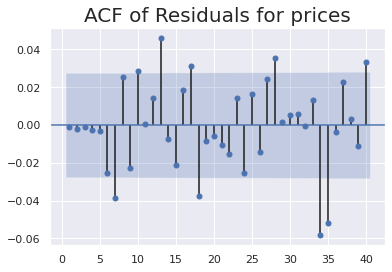

In [98]:
sgt.plot_acf(X_train_ftse.res_price, zero=False, lags=40)
plt.title('ACF of Residuals for prices', size=20)
plt.show()

It resembles white noise, lets plot and confirm

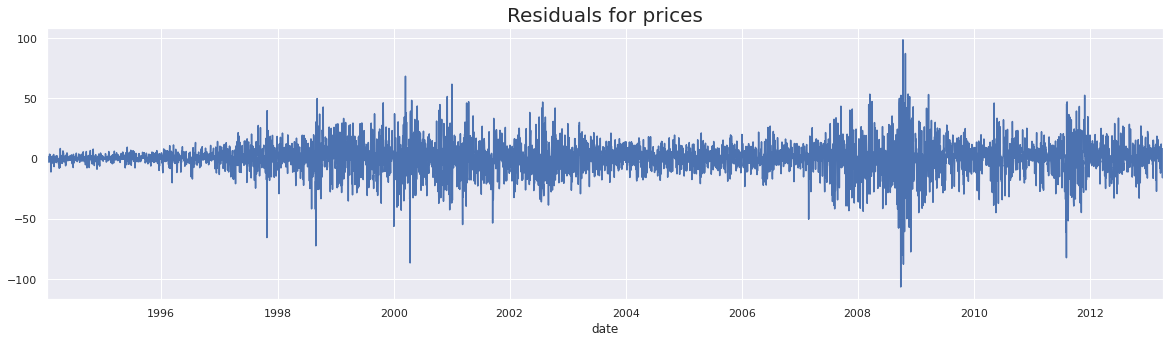

In [100]:
X_train_ftse.res_price[1:].plot(figsize=(20, 5))
plt.title('Residuals for prices', size=20)
plt.show()

In [102]:
X_train_ftse['res_ret'] = results_ret_ar6.resid
print(X_train_ftse['res_ret'].mean())
print(X_train_ftse['res_ret'].var())
print(sts.adfuller(X_train_ftse.res_ret))

-5.352639991424048e-05
1.3548334611582318
(-70.78446952875304, 0.0, 0, 5019, {'1%': -3.4316535759402753, '5%': -2.8621160400844468, '10%': -2.567076626752987}, 15688.340315928679)


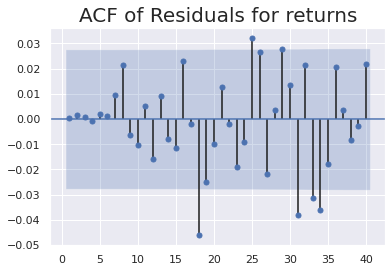

In [103]:
sgt.plot_acf(X_train_ftse.res_ret, zero=False, lags=40)
plt.title('ACF of Residuals for returns', size=20)
plt.show()

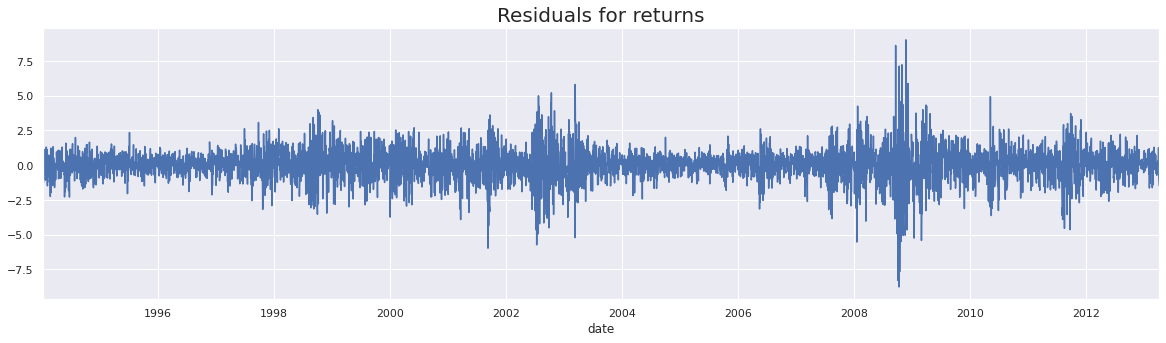

In [104]:
X_train_ftse.res_ret[1:].plot(figsize=(20, 5))
plt.title('Residuals for returns', size=20)
plt.show()